# 3) N-gram 언어 모델(N-gram Language Model)

이전 챕터에서 배웠듯 전통적인 언어모델인 SLM의 희소문제 등의 한계점을 고려하여 나온 모델이 N-gram이다.

N-gram의 아이디어는, 기존의 SLM은 이전에 등장한 모든 단어들을 고려하여 다음 단어를예측을 수행한 것에 비해

직전 N개의 단어들만 보고 다음 단어를 예측한다는 아이디어이다.

### 1. 코퍼스에서 카운트하지 못하는 경우의 감소.

문장이 길어질수록 SLM의 희소 문제가 더욱 심각해지게 되는데, 위의 N-gram에 대한 아이디어를 사용하면 이러한 문제가 일부 해결이 될 수 있을 것이다.

$$P(is|An adorable little boy)≈ P(is|boy)$$

An adorable little boy라는 문장뒤에 is를 예측하는 것을 boy 뒤에 is로 예측하는 방식으로 한다면 count 높아질 확률이 더 높아질 것이다.

$$ P(is|An adorable little boy)≈ P(is|little boy) $$

boy 만 보고 is를 예측하는 것이 너무 일반화를 한 것 같다면, little boy를 보고 is를 예측하는 것이 좀 더 합리적으로 보일 것이다.

### 2. N-gram

위에서 예시로 들었듯, N개의 단어를 선택해 다음 단어를 예측하는 것이 바로 N-gram의 아이디어인데, 각각 n의 개수별로 아래처럼 분류할 수 있다.

* unigrams : an, adorable, little, boy, is, spreading, smiles
* bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
* trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
* 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

n-gram 방식을 통한 언어 모델에서, 다음 단어에 대한 예측은 직전 n-1개의 단어를 보고 결정한다.

'An adorable little boy is spreading' 이라는 문장을 가지고 다음에 나올 단어를 예측을 하고 싶어 4-gram을 이용했다고 가정하자.

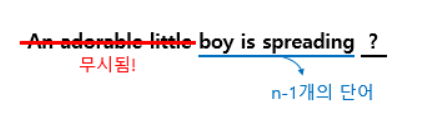

$$ P(w|boy is spreading)={count(boy is spreading w) \over count(boy is spreading)} $$

* count(boy is spreading) = 1000
* count(boy is spreading insult) = 500
* count(boy is spreading smiles) = 200

위와 같이 count가 계산되었다고 가정하면, spreading 다음에 올 단어는\
* insult = 50% 확률
* smiles = 20% 확률\
즉 언어 모델은 spreading 다음에 나올 단어를 insult라고 판단할 수 있게 되는 것이다.

### 3. N-gram Language Model의 한계

이러한 N-gram 방식을 사용해도 여전히 기존의 희소 문제와 비롯해서 문맥파악 문제에 대한 한계점이 존재한다.

### (1) 희소 문제(Sparsity Problem)

우선, 희소문제는 n개의 단어만을 보고 예측을 하면 count가 올라갈 수 있는 확률은 높아져도, 여전히 희소문제에 대한 근본적인 해결책이 될 수는 없다.

문맥파악 문제 같은 경우는, 전체적인 문장의 문맥을 보지 못하고 n개의 단어에만 의존하여 단어를 예측하면 엉뚱한 단어를 예측하게 될 수 있는 문제를 말한다.

예를들어, '작고 사랑스러운(an adorable little)' 부분을 제외하고 'boy is spreading' 부분만을 사용한다 했을 때

소년이 '모욕을 퍼트렸다.' 와 같이 앞의 문장과 어울리지 않는 부정적인 단어를 예측할 수 있게 되는 문제를 말한다.

### (2) n을 선택하는 것은 trade-off 문제.

직관적으로 떠올려 봤을 때, n을 적게할 수록 count될 확률은 올라가지만 n이 커질수록 예측의 정확도는 올라가는 trade-off문제가 발생할 수 있을 것이다.

실제 n-gram을 사용할 때에는 n는 최대 5이상 넘어가지 않게 사용할 것을 권장하고 있다.

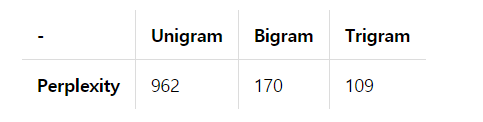

위는 preplexity로 계산한 성능표이다. preplexity의 수치는 적을수록 성능이 좋은것이며, n이 커질수록 성능이 더 좋은 것을 쉽게 확인할 수가 있다.